# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/2023-Melekhin-TimeSeriesCourse-main/practice/05 Snippets')

Импорт библиотек и модулей

In [5]:
!pip install stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 3.7 MB/s eta 0:00:00


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

import stumpy

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

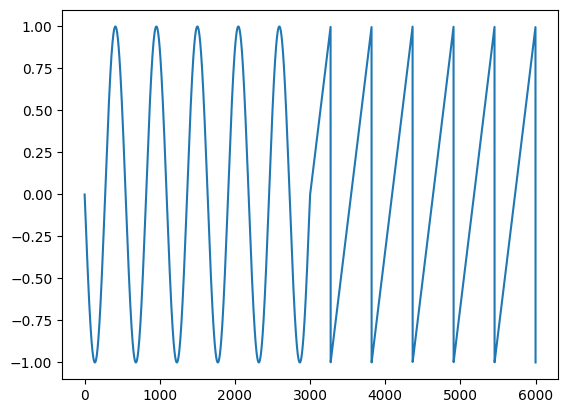

In [7]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [8]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


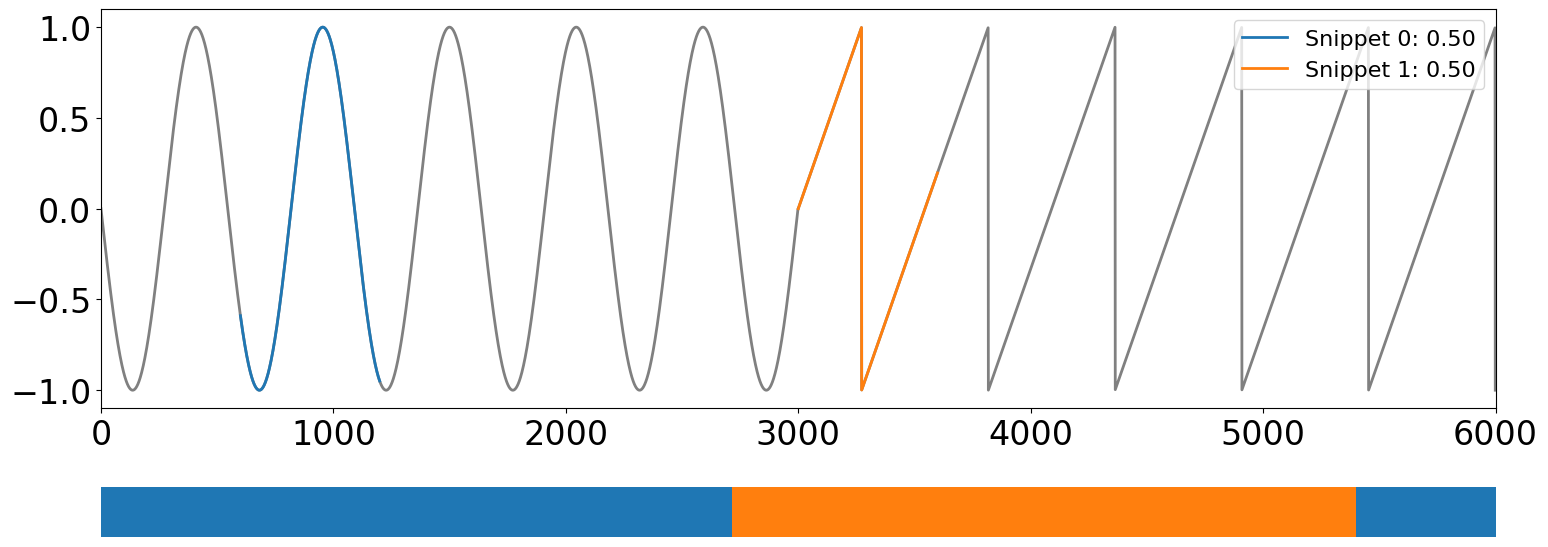

<Axes: >

In [9]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [10]:
import pandas as pd
df = pd.read_csv(r'datasets/PAMAP/PAMAP.txt', sep=' ', header=None).T
start_time = 1790
end_time = 1930

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10].to_numpy()
snp = snippets(ts, 500, 2, percentage=0.5)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

500


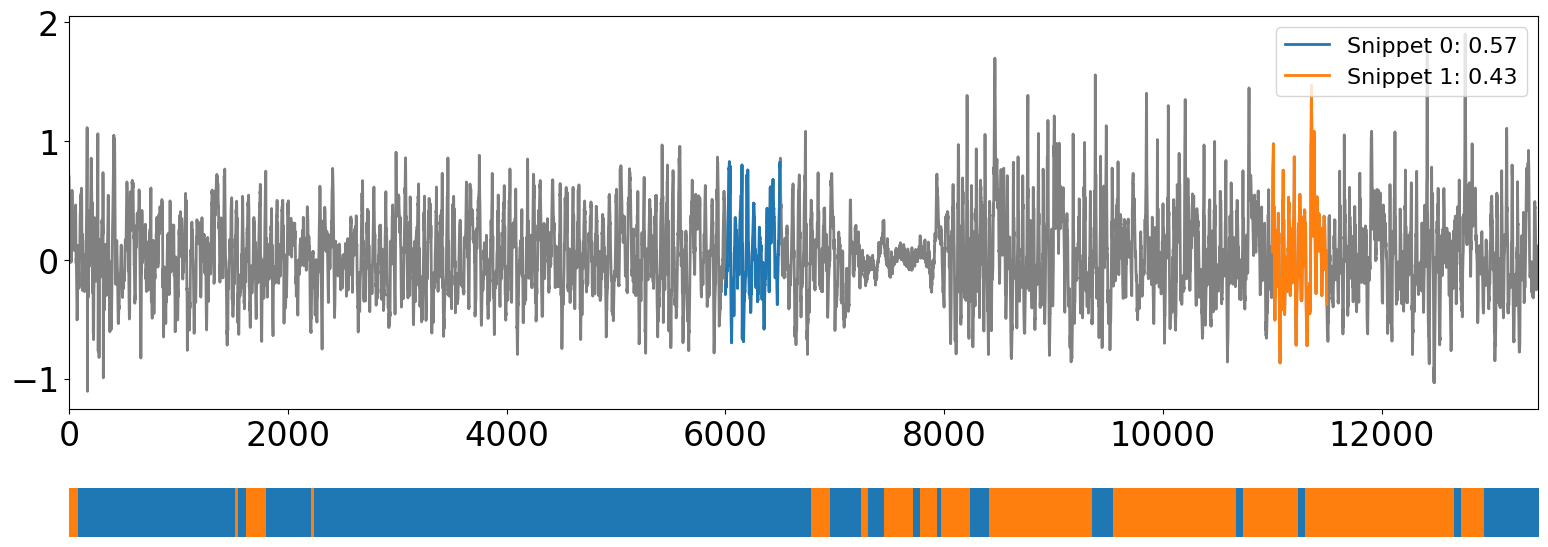

<Axes: >

In [11]:
plot_snippets(ts, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [22]:
data = pd.read_csv(r'datasets/PAMAP/PAMAP.txt', sep=' ', header=None)
# INSERT YOUR CODE
# Получение данных об активности за нужный промежуток
start = 1790
stop = 1930
labels = data.loc[:,start < data.iloc[0,:]].loc[:,stop > data.iloc[0,:]].iloc[1,:].to_numpy()

#Создание массива для меток, полученных сниппетами
snp_labels = np.full(len(labels),labels[0])

# Запись меток
snippets_regimes = snp[5]
snippets_regimes_13 = snippets_regimes[snippets_regimes[:,0]==1]

for lb_snp in snippets_regimes_13:
  for i in range(lb_snp[1],lb_snp[2]):
    snp_labels[i] = 13

# Определение точности разметки
TPN = sum(np.where(snp_labels == labels,1,0))
accuracy = TPN / len(labels)
accuracy

0.8657383275001862

In [23]:
def SnpRegimes(snp, labels):
  snp_labels = np.full(len(labels),labels[0])
  snippets_regimes = snp[5]
  snippets_regimes_13 = snippets_regimes[snippets_regimes[:,0]==1]
  for lb_snp in snippets_regimes_13:
    for i in range(lb_snp[1],lb_snp[2]):
      snp_labels[i] = 13
  return snp_labels

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

При помощи сниппетов можно классифицировать временной ряд

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

1000


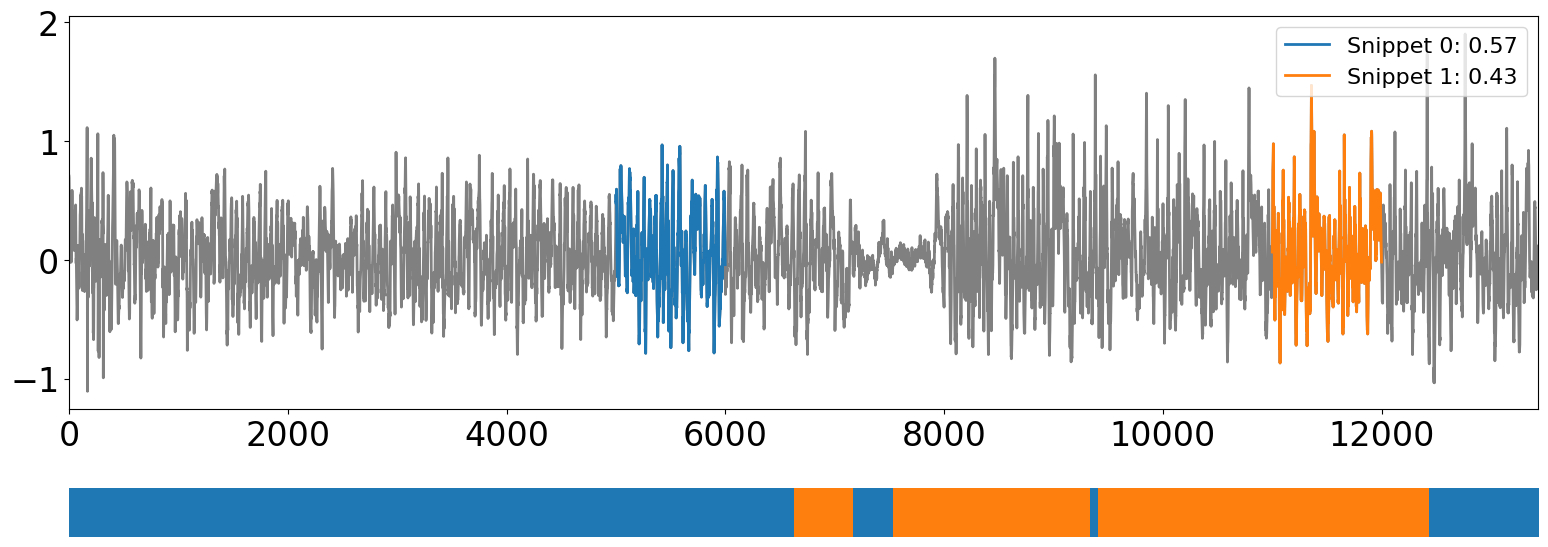

<Axes: >

In [30]:
ts_x = data.loc[:,start < data.iloc[0,:]].loc[:,stop > data.iloc[0,:]].iloc[10,:].to_numpy()
snp_x = snippets(ts_x, 1000, 2, percentage=0.5)
plot_snippets(ts_x, snp_x)


1000


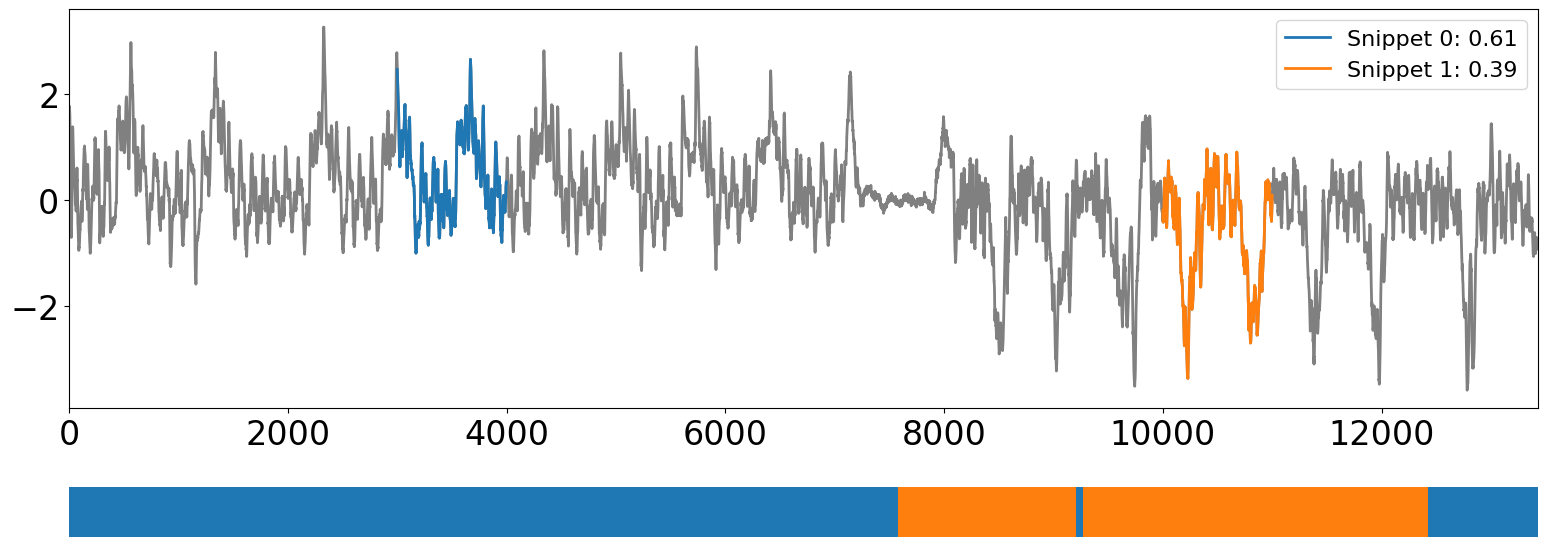

<Axes: >

In [31]:
ts_y = data.loc[:,start < data.iloc[0,:]].loc[:,stop > data.iloc[0,:]].iloc[11,:].to_numpy()
snp_y = snippets(ts_y, 1000, 2, percentage=0.5)
plot_snippets(ts_y, snp_y)

1000


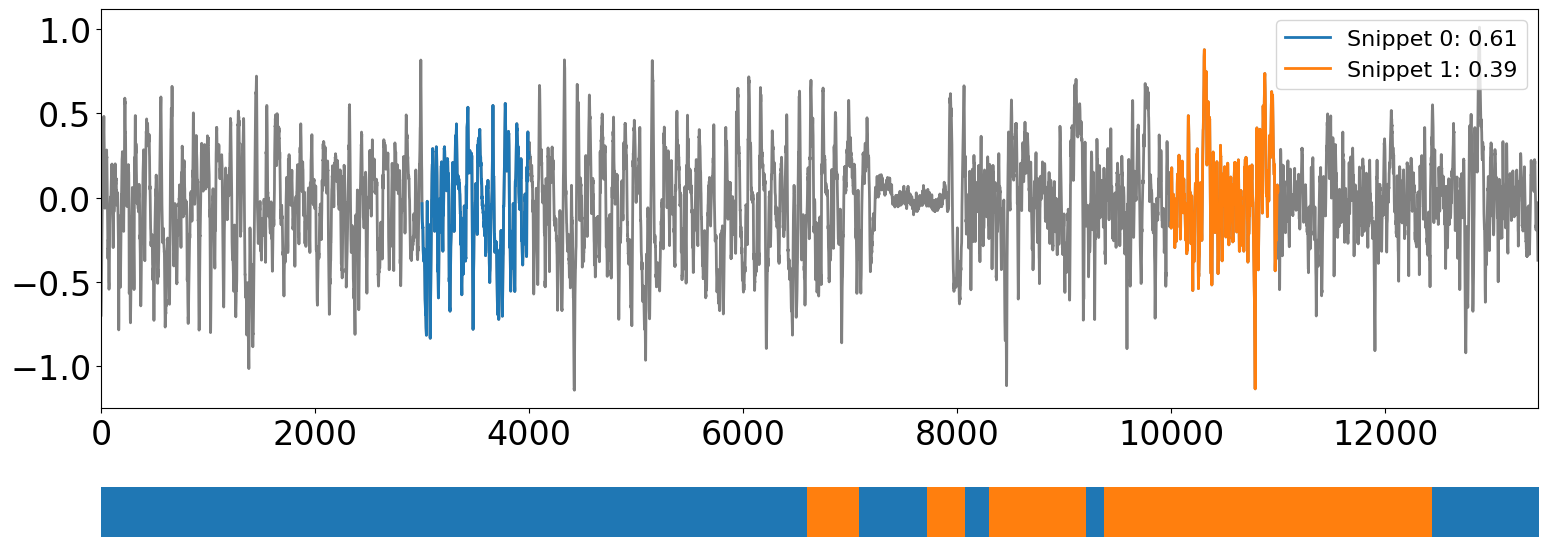

<Axes: >

In [32]:
ts_z = data.loc[:,start < data.iloc[0,:]].loc[:,stop > data.iloc[0,:]].iloc[12,:].to_numpy()
snp_z = snippets(ts_z, 1000, 2, percentage=0.5)
plot_snippets(ts_z, snp_z)

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [33]:
snp_labels_3d = np.full(len(labels),labels[0])
snp_labels_x = SnpRegimes(snp_x, labels)
snp_labels_y = SnpRegimes(snp_y, labels)
snp_labels_z = SnpRegimes(snp_y, labels)
snp_labels_vote = np.round(sum([snp_labels_x,snp_labels_y,snp_labels_z])/3.)
TPN = sum(np.where(snp_labels_vote == labels,1,0))
accuracy = TPN / len(labels)
accuracy

0.9186089805644501

In [34]:
print('Разметки многомерного и одномерного рядов не совпадают в ',sum(snp_labels_vote != snp_labels) / len(snp_labels_vote) * 100, '%')

Разметки многомерного и одномерного рядов не совпадают в  13.344254970586045 %


❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

Получение разметки многомерного ряда значительно улучшило точность разметки. Точность повысилась с 56 до 92 процентов. При этом разметки многомерного и одномерного рядов при сравнении не совпадают в 36 процентах.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [35]:
df = pd.read_csv(r'datasets/PAMAP/PAMAP.txt', sep=' ', header=None).T
ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10].to_numpy()


In [38]:
stumpy.snippets(ts, 500, 2)[4]

array([405522.18902475, 368207.88224424])

In [39]:
stumpy.snippets(ts, 500, 3)[4]

array([405522.18902475, 368207.88224424, 354171.61173151])

In [40]:
stumpy.snippets(ts, 500, 8)[4]

array([405522.18902475, 368207.88224424, 354171.61173151, 347424.02841121,
       341985.22589293, 338966.96377853, 336167.5866041 , 333858.18556574])

In [41]:
k = 9
snippets = stumpy.snippets(ts, 500, k)
prof_area = snippets[4]
prof_area

array([405522.18902475, 368207.88224424, 354171.61173151, 347424.02841121,
       341985.22589293, 338966.96377853, 336167.5866041 , 333858.18556574,
       331828.94380633])

In [42]:
change = []
for i in range(1, 9):
    change.append(prof_area[i-1] / prof_area[i] - 1)

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [43]:
import plotly.express as px

df = pd.DataFrame([range(1, 10), prof_area]).T
df.columns = ['k', 'ProfileArea']
px.bar(df, x='k', y='ProfileArea', labels={'k':'k', 'ProfileArea':'ProfileArea'})

df = pd.DataFrame([range(2, 10), change]).T
df.columns = ['k', 'Change']
px.bar(df, x='k', y='Change', labels={'k':'k', 'Change':'Change'})

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?

Наилучшее значение k = 2 для данного многомерного ряда.